In [33]:
# libraries required for the data anaylsis

import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.io as pio
import plotly.graph_objs as go
import plotly.express as px

import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import warnings

from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

%matplotlib inline
plt.style.use('ggplot')


In [34]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [35]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **Date** - house was sold
* **Price** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


## Data Preparation

In [36]:
df.shape

(21597, 21)

 Number of rows(observation) : There are 21597 rows in the DataFrame  
 Number of columns(observation) : There are 21 columns in the Dataframe

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [38]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [39]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [40]:
# Fill NaN values in the waterfront column with 'No'
df['waterfront'].fillna('No', inplace=True)
df['waterfront'].isna().sum()

0

In [41]:
df.drop(columns=['yr_renovated'], inplace=True)
df.drop(columns=['view'], inplace=True)
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [42]:
df['grade'].value_counts()

grade
7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: count, dtype: int64

In [43]:
#conversion of date to dtype datetime to confirm timeframe of dataset
date_df=pd.to_datetime(df["date"])
date_df

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [44]:
# Timestamp of the dataframe
date_df.min(),date_df.max()

(Timestamp('2014-05-02 00:00:00'), Timestamp('2015-05-27 00:00:00'))

### check for duplicates 

In [45]:
df.duplicated().sum()

0

In [46]:
df['id'].value_counts()

id
795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: count, Length: 21420, dtype: int64

some houses seems like they were sold more than once between the 1 years timeframe 

In [47]:
#checking for how many houses sold more than once 
sold_more_than_once = len(df) - len(df['id'].value_counts())
sold_more_than_once 

177

So there has been 177 homes sold more than once in the period of one year from 2/05/2014 to 27/05/2015

In [48]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')
(df['sqft_basement'].dtype)

dtype('float64')

<Axes: ylabel='sqft_basement'>

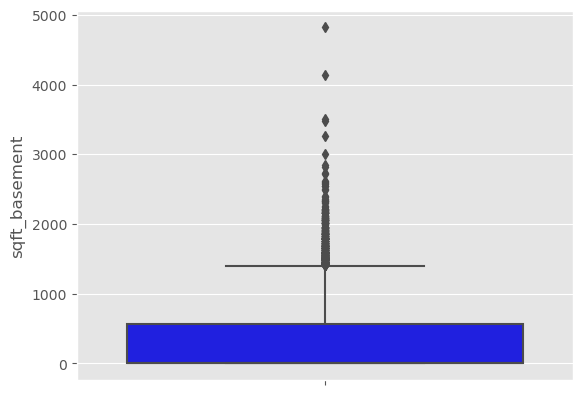

In [49]:
sns.boxplot(y=df['sqft_basement'], color='b')

In [50]:
median_value= df['sqft_basement'].median()

df["sqft_basement"].replace(np.nan,median_value, inplace=True)
df["sqft_basement"].value_counts()

sqft_basement
0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: count, Length: 303, dtype: int64

In [51]:

# Create a binary feature indicating whether a house has a basement
df['has_basement'] = df['sqft_basement'].apply(lambda x: 0 if x == 0 else 1)

# Apply log transformation to the basement square footage
df['log_sqft_basement'] = df['sqft_basement'].apply(lambda x: np.log1p(x))

# Bin the basement sizes into categories
bins = [0, 500, 1000, 1500, 2000, np.inf]
labels = ['No Basement', 'Small', 'Medium', 'Large', 'Very Large']
df['basement_size_category'] = pd.cut(df['sqft_basement'], bins=bins, labels=labels, right=False)

# Check the first few rows to verify the changes
print(df[['sqft_basement', 'has_basement', 'log_sqft_basement', 'basement_size_category']].head())


   sqft_basement  has_basement  log_sqft_basement basement_size_category
0            0.0             0           0.000000            No Basement
1          400.0             1           5.993961            No Basement
2            0.0             0           0.000000            No Basement
3          910.0             1           6.814543                  Small
4            0.0             0           0.000000            No Basement


In [52]:
# Checking the counts for each value in the column bedrooms
df["bedrooms"].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [53]:


#replace the bedroom with 3 its mode

df["bedrooms"].replace(33,3, inplace=True)
df["bedrooms"].value_counts()

bedrooms
3     9825
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: count, dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      21597 non-null  int64   
 1   date                    21597 non-null  object  
 2   price                   21597 non-null  float64 
 3   bedrooms                21597 non-null  int64   
 4   bathrooms               21597 non-null  float64 
 5   sqft_living             21597 non-null  int64   
 6   sqft_lot                21597 non-null  int64   
 7   floors                  21597 non-null  float64 
 8   waterfront              21597 non-null  object  
 9   condition               21597 non-null  object  
 10  grade                   21597 non-null  object  
 11  sqft_above              21597 non-null  int64   
 12  sqft_basement           21597 non-null  float64 
 13  yr_built                21597 non-null  int64   
 14  zipcode               

In [55]:
# Splitting the columns based on variable types
categorical_columns = []
numerical_columns = []
for i in df.columns:
    if df[i].dtype == 'O':
        categorical_columns.append(i)
    else:
        numerical_columns.append(i)
        
print(f"Categorical columns:",  categorical_columns) 
print(f"Numerical columns:",  numerical_columns) 

Categorical columns: ['date', 'waterfront', 'condition', 'grade']
Numerical columns: ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'has_basement', 'log_sqft_basement', 'basement_size_category']


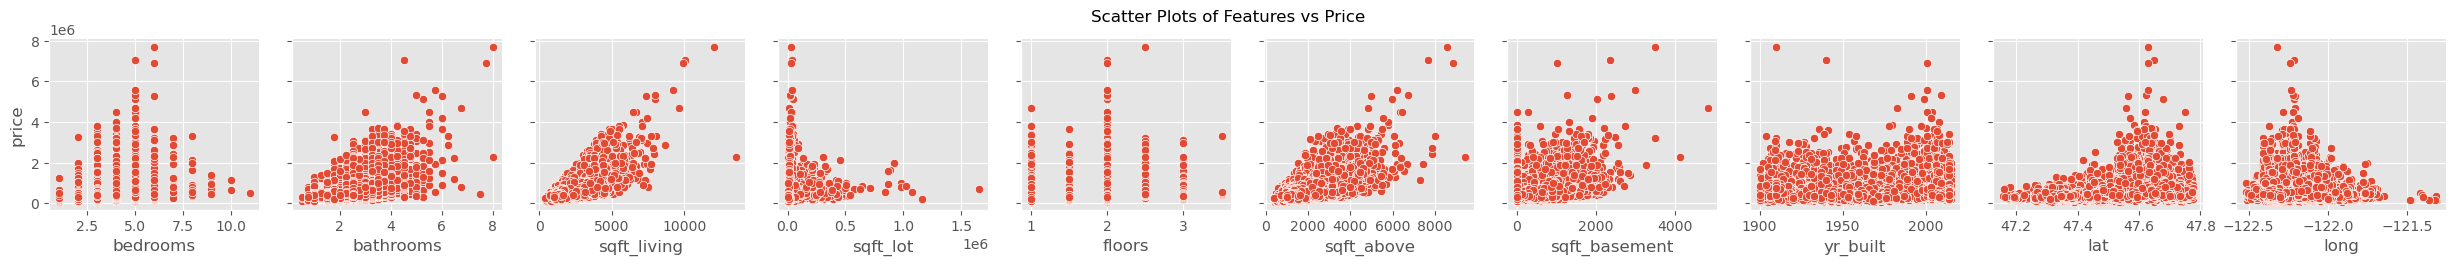

In [67]:

# Select the columns of interest
numerical_columns1 = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                      'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long']

# Create a subset of the DataFrame with these columns
df_subset = df[numerical_columns1]

# Plot a pair plot for the selected columns
sns.pairplot(df_subset, y_vars=['price'], x_vars=numerical_columns1[1:])
plt.suptitle('Scatter Plots of Features vs Price', y=1.02)
plt.show()


### interpretation:

1. Bedrooms
> The plot shows a wide range of prices for different numbers of bedrooms.
> There isn't a strong linear relationship between the number of bedrooms and price.  

2. Bathrooms  
> There seems to be a positive relationship, with more bathrooms generally associated with higher prices.  

3. Sqft living   
> There is a clear positive correlation between the square footage of living space and price, thus significant feature for predicting price 

4. Sqft Lot   
> The relationship is not as clear, this might be a less significant feature or require transformation for better modelling   

5. Floors   
> There is a slight positive trend, but the relationship not that strong   

6. sqft above  
> There is a positive correlation  

7. Sqft basement  
> There is a positive trend, it might add value to the model but shows more scatter compared to sqft living   

8. yr Built  
> The relationship is not very clear, prices do not increase consistently with the yr built.   

9. Lat and long  
> Both plots show some clustering, indicating geographic location influences price.  


Based on the plots `sqft_living`, `sqft_above`, `bathrooms`, and `sqft_basement` show stronger relationships with price, although Latitude and longitude also seem important due to location effects.   



In [69]:
df_subset.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long
price,1.000000,0.315954,0.525906,0.701917,0.089876,0.256804,0.605368,0.321108,0.053953,0.306692,0.022036
bedrooms,0.315954,1.000000,0.527874,0.593182,0.033606,0.183721,0.492549,0.303500,0.160748,-0.011612,0.136574
bathrooms,0.525906,0.527874,1.000000,0.755758,0.088373,0.502582,0.686668,0.278485,0.507173,0.024280,0.224903
sqft_living,0.701917,0.593182,0.755758,1.000000,0.173453,0.353953,0.876448,0.428660,0.318152,0.052155,0.241214
sqft_lot,0.089876,0.033606,0.088373,0.173453,1.000000,-0.004814,0.184139,0.015031,0.052946,-0.085514,0.230227
floors,0.256804,0.183721,0.502582,0.353953,-0.004814,1.000000,0.523989,-0.241866,0.489193,0.049239,0.125943
sqft_above,0.605368,0.492549,0.686668,0.876448,0.184139,0.523989,1.000000,-0.051175,0.424037,-0.001199,0.344842
sqft_basement,0.321108,0.303500,0.278485,0.428660,0.015031,-0.241866,-0.051175,1.000000,-0.130085,0.109853,-0.142369
yr_built,0.053953,0.160748,0.507173,0.318152,0.052946,0.489193,0.424037,-0.130085,1.000000,-0.148370,0.409993
lat,0.306692,-0.011612,0.024280,0.052155,-0.085514,0.049239,-0.001199,0.109853,-0.148370,1.000000,-0.135371


In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the relevant columns (excluding the target variable 'price')
predictor_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                     'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long']

# Create a subset of the DataFrame with these columns
X = df[predictor_columns]

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Print the VIF data
print(vif_data)


         Feature            VIF
0       bedrooms      24.183780
1      bathrooms      27.994253
2    sqft_living     892.250191
3       sqft_lot       1.200384
4         floors      15.926614
5     sqft_above     669.935685
6  sqft_basement      46.987290
7       yr_built    6697.389683
8            lat  115580.360517
9           long  123876.847930
